# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

|Column|Significance|
|:----:|:----:| 
|  imdb_id  | Indicates the ID of the movie according to IMDb  |
|  popularity  |  Measure of popularity (Higher is better) |
| budget  | How much it costs to produce the movie  |
| revenue  | How much the movie revenue from box ofice and Blue-ray  |
| original_title  |  Title of the movie |
| cast  |  The main actors/actresses in the movie |
|  homepage | the webpage corresponding to the movie  |
| director  |  director of the movie |
| tagline  |  Short description of the movie |
| keywords  | Indicates the main narrative themes of the movie  |
| overview  | Synopsis of the movie  |
| runtime  | duration of the movie in minutes  |
| genres  |  genre(s) of the movie |
|  production_companies | Credits the production companies  |
|  release_date |  When was the movie released (%m/%d/%Y) |
|  vote_count | how many users voted for a given movie  |
|  vote_average   |  Average of votes  |
|   release_year  |   The year when the movie was released  |
|   budget_adj     |    Budget adjusted for today's infaltion rate         |
|   revenues_adj     |    Revenues adjusted for today's infaltion rate         |
--------------
### Question(s) for Analysis
> Question 1: Is there a correlation between the budget of given movie and the revenues?
> 
> Question 2: Is there a correlation between when is the movie realeased (seasonality) and it's revenue?

> Question 3: Do movies with longer runtime have higher popularity?

> Question 4: What is the vote average for movies released in each month of the year? and is the vote average normally distubuted ?

> Question 5: Which actors cause the movies to have high revenues?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas
#!pip install --upgrade seaborn

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> First, I will convert the release_date column from object dtype to datetime dtype, and I will drop the release_year column because it is redundant as well as the homepage column, imdb_id column, overview column, and both budget_adj, revenue_adj since inflation will not cause any detoriartion for correlation between our features in our EDA, as well as other columns irrelevent to the EDA.
 

In [5]:
df.drop("release_year",axis=1,inplace=True)
df.drop("homepage",axis=1,inplace=True)
df.drop("imdb_id",axis=1,inplace=True)
df.drop("overview",axis=1,inplace=True)
df.drop("budget_adj",axis=1,inplace=True)
df.drop("revenue_adj",axis=1,inplace=True)
df.drop("production_companies",axis=1,inplace=True)
df.drop("tagline",axis=1,inplace=True)
df.drop("keywords",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)

In [6]:
df["release_date"]=pd.to_datetime(df["release_date"])

In [7]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3


> Inorder to clean our dataset, there are different dtypes which will of use (numerical, categorical) which requires different methods of cleaning.

In [8]:
num=['budget', 'revenue', 'runtime', 'vote_count','vote_average','popularity']
obj=["cast","original_title","director","genres"]

> I will impute(fillna) columns with numerical values with the mean of each column.

In [9]:
def impute_by_mean(df,cols: list):
    for i in cols:
        print(i)
        avg=df[i].mean()
        df[i].fillna(value=avg,inplace=True)

In [10]:
print("The numerical columns are:")
impute_by_mean(df,num)

The numerical columns are:
budget
revenue
runtime
vote_count
vote_average
popularity


> I will impute(fillna) columns with categorical value with the mode of each column.

In [11]:
def impute_by_mode(df,cols: list):
    for i in cols:
        print(i)
        mode=df[i].mode()[0] # when there is equal number of occurances of the mode
        df[i].fillna(value=mode,inplace=True)

In [12]:
print("The categorical columns are:")
impute_by_mode(df,obj)

The categorical columns are:
cast
original_title
director
genres


> After cleaning the numerical columns, make sure there are 0 NaN values in this subset of our dataframe (supposed to be 0)

In [13]:
df.isnull().sum(axis=0).sum()

0

> Check for any correlation between the cleaned columns.

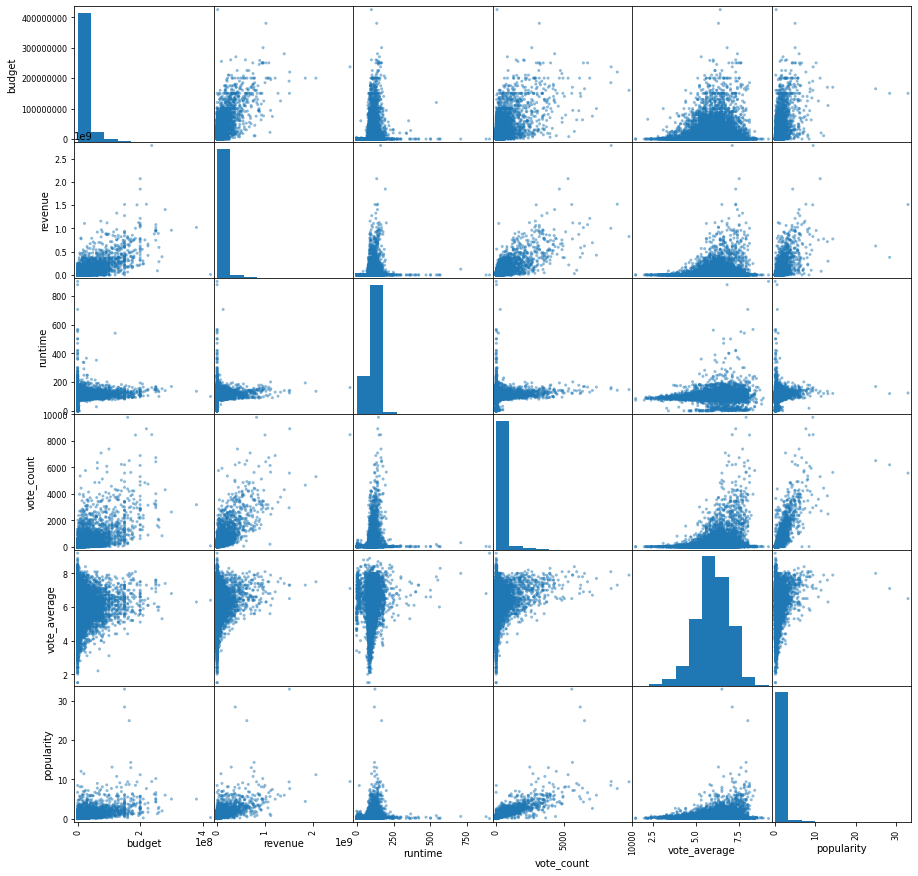

In [14]:

pd.plotting.scatter_matrix(df[num],figsize=(15,15));

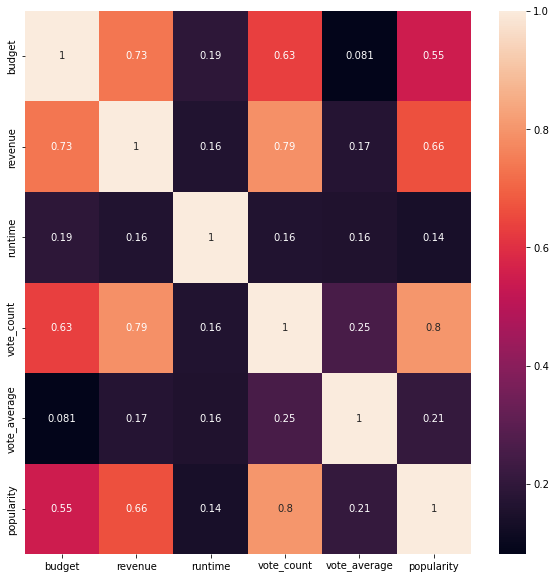

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True,cmap='rocket');


<a id='eda'></a>
## Exploratory Data Analysis


### Is there a correlation between the budget of given movie and the revenues?

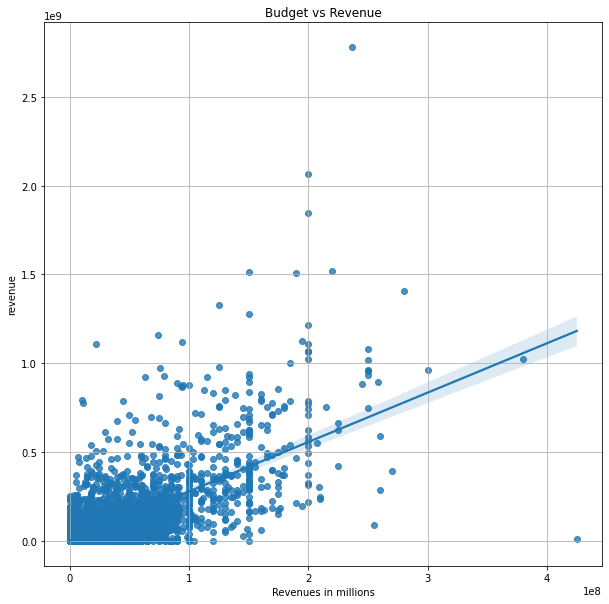

In [16]:
plt.figure(figsize=(10,10))

sns.regplot(x=df['budget'],y=df['revenue']);
plt.xlabel("Budget in 100s of millions")
plt.xlabel("Revenues in millions")
plt.grid()
plt.title("Budget vs Revenue");

### From the plot above we can conclude that well funded movies usually have better revenues, since the regression line has positive slope.

### Is there a correlation between when is the movie realeased (seasonality) and it's revenues, and when is that apparant most?

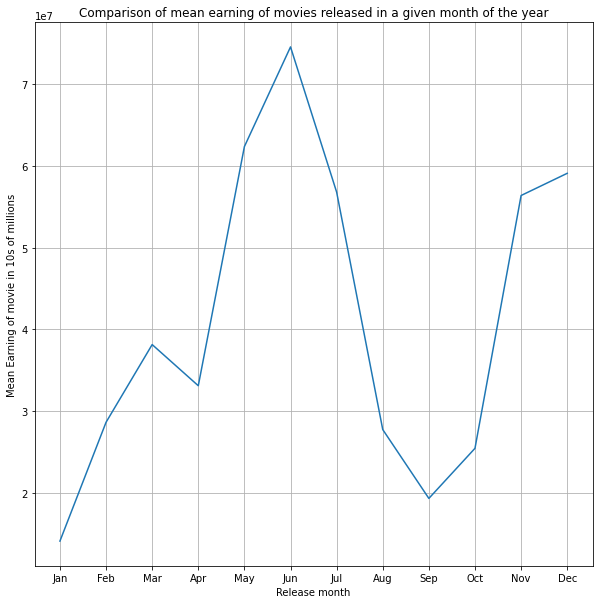

In [17]:
df_sorted=df.sort_values(by='release_date')
df_sorted["release_date"]=pd.to_datetime(df_sorted["release_date"])
df_sorted["release_date"]=df_sorted["release_date"].dt.month
ticks=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_sorted.groupby("release_date")["revenue"].mean().plot(kind="line",figsize=(10,10))
plt.xticks(np.arange(1,13),ticks)
plt.xlabel("Release month");
plt.ylabel("Mean Earning of movie in 10s of millions");
plt.title("Comparison of mean earning of movies released in a given month of the year")
plt.grid()

### From the plot above there is significant difference between the revenues across the months of the year.

### Which months are usually saturated with movies debuts?

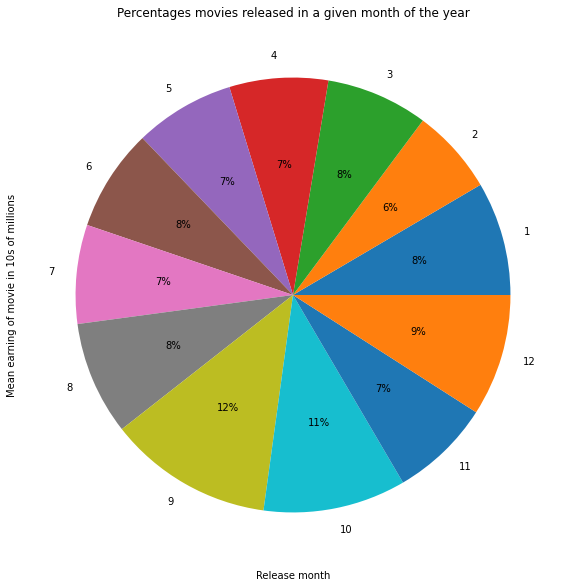

In [18]:
df_sorted.groupby("release_date")["release_date"].count().plot(kind="pie",figsize=(10,10), autopct='%1.0f%%')
plt.xlabel("Release month");
plt.ylabel("Mean earning of movie in 10s of millions");
plt.title("Percentages movies released in a given month of the year");
plt.grid()

### Usually the Fall season have the highest concentration of movie releases about $40$% of all releases, so if want to choose if your movies will launch in christmas eve or holidays according to this metric, it's better to release the movies in the spring or the winter.

### What is the vote average for movies released in each month of the year? and is the vote average normally distubuted ?

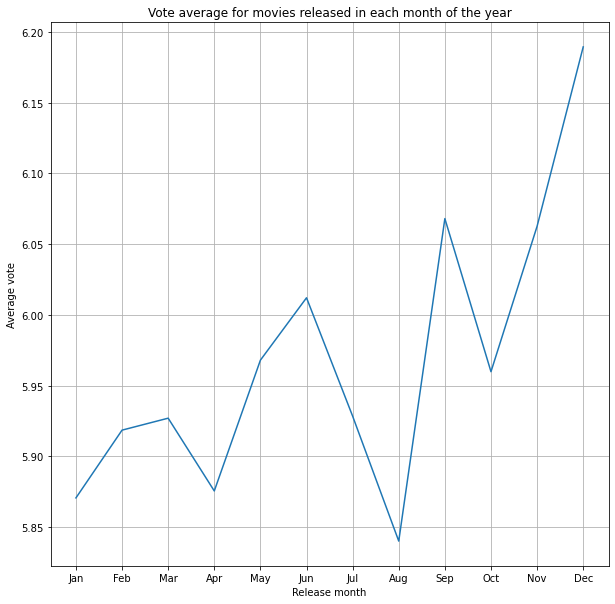

In [19]:
plt.figure(figsize=(10,10))
df_sorted.groupby("release_date")["vote_average"].mean().plot(kind="line");
plt.xlabel("Release month")
plt.ylabel("Average vote")
plt.xticks(np.arange(1,13),ticks)
plt.title("Vote average for movies released in each month of the year")
plt.grid()

### There is a difference in the average vote between months but it is not significant enough to have a clear conclusion to whether releasing a movie in specific month will cause it to have better ratings.

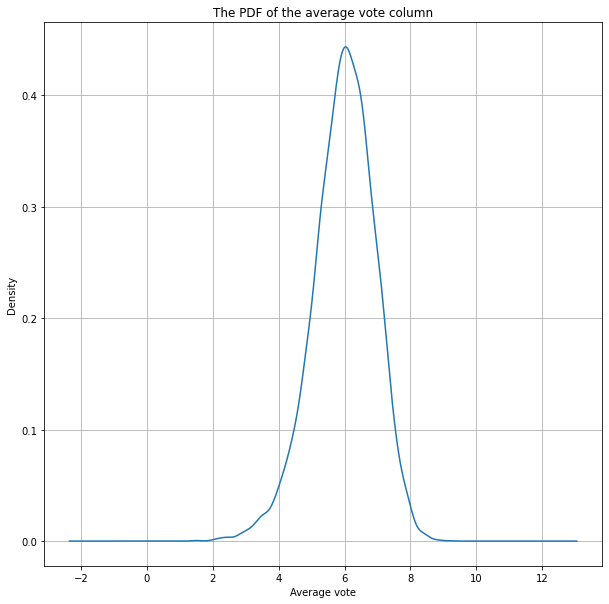

In [20]:
plt.figure(figsize=(10,10))
df_sorted["vote_average"].plot(kind="kde");
plt.xlabel("Average vote");
plt.title("The PDF of the average vote column")
plt.grid()

### Usually movies in TMDb have a rating between $4-8$.

### What is the percentage of movies which have average vote between $4-8$?

In [21]:
common=df_sorted[(df_sorted["vote_average"]>4)&(df_sorted["vote_average"]<8)]
print("{}%".format(round(len(common)/len(df_sorted),2)*100))

96.0%


### This actually confirms that the stdev for average vote is $1$ and the mean is $6$, the chances for having a movie with hgiher than $8$ rating is only $2$%. 

### Does having known actors usually means that the movies will have high revenues?

In [22]:
df["cast"]=df["cast"].str.split("|")
df=df.explode("cast")

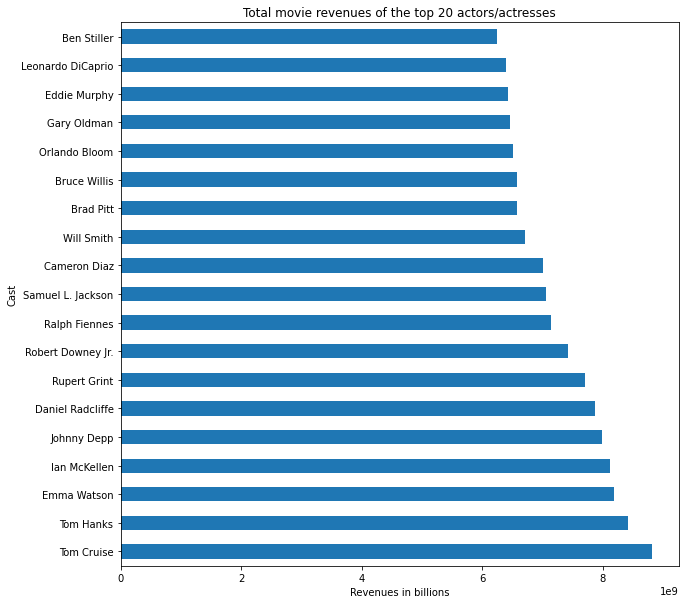

In [23]:
actors_stats=df.groupby("cast")["revenue"].sum().sort_values(ascending=False)
actors_stats.loc[actors_stats.index[1:20]].plot(kind="barh",figsize=(10,10));
plt.xlabel("Revenues in billions")
plt.ylabel("Cast")
plt.title("Total movie revenues of the top 20 actors/actresses");

### From the plot above we can conclude that having known actors/actresses in your movie will usually mean it will be succesful, the first 20 actors/actresses are very renowned.

<a id='conclusions'></a>
## Conclusions
Question 1:
>We can conclude the movies with higher budgets, usually only few production ccompanies can provide such budgets are more likely to be successful.

Question 2:
> The movies released in holidays season (May-July) and Christmas Eve usualy have higher revenues than the movies which are not, but movies released in Christmas Eve also tend to have better ratings but the difference is insignificant, so if you want to maximise the chances of having high revenues, releasing the movies during the holidays and christmas eve is a sound choice.

Question 3:
> Percentage of movies released is consistent across months of the year, but releasing movies in some season such as spring is prefrerrable if you want to avoid competition, but the tradeoff is that your movie might not gross as much as it will in the holidays and christmas eve.

Question 4:
> The normal distrubution applies to the Vote average column, most of the movies have between $4-8$ rating, only a rare subset of the movies will score above $8$.

Question 5:
> Having known actors in a movie usually means that the movie will have high revenues.

### Limitations

1-
> Outliers in the vote average column may occur with movies where the vote_count is extermely low, so for example if we have a movie where only one person gave it 10/10 or a 0/10, then it is not a clear represnative of the movie rating, so we might need to ignore movies that have few votes, or even select movies to comapare according to it's popularity. 

2-
> A compreshensive comparsion between each director is a bit diffucult since there almost 6000 directors in this dataset.

3-
> Some movies have a budget of 0$ which makes it not convenient when creating a ratio column which is the revenue/budget values for each movie, so the solution might be removing those movies.


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0